# ESG





In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

En primer lugar, importamos la base de datos de nuestro interés.

In [9]:
esg = pd.read_csv('data/ESG consumer electronics.txt', sep='\t') 

ESG son los criterios que los inversores tienen en cuenta a la hora de realizar una inversión sobre una empresa. La composición de estas 3 letras hace referencia a las siglas de las palabras Environmental, Social y Governance las cuales hacen referencia a:

* Environmental : Impacto ambiental de la empresa ya sea directa o indirectamente.
* Social: Impacto social de la empresa.
* Governance: Gobierno corporativo de la empresa.

Cabe resaltar que estos factores ayudan a los inversores a evaluar no solo el desempeño financiero, sino también el impacto y la sostenibilidad a largo plazo de la empresa.

In [10]:
esg.shape

(14, 14)

In [11]:
esg

,Name,Sustnlytcs ESG Rsk Scr,ISS QualSc,ESG Disc Score,% Indep Directors,% Women on Bd,CEO Tnr AsOf FY End,Tot Comp Pd to CEO & Equiv,Pers Expn per Empl,% Women Emp,LTIR,Engy Intens/Sls,Wste Per Sls,Wtr Intens/Sls
0,Median,12.06,4.5,41.28,54.55,16.67%,2,1.79M,20.92k,36.15%,0.15,10.8,1.58,122
1,Nintendo Co Ltd,15.62,4,--,46.15,30.77%,5.83,2.48M,49.29k,--,--,--,--,--
2,Garmin Ltd,20.99,9,--,66.67,33.33%,11,6.54M,--,--,--,--,--,--
3,Logitech International SA,8.51,1,--,100,40.00%,0.33,16.00M,--,38.00%,--,5.75,--,--
4,LG Electronics Inc,20.45,5,--,66.67,16.67%,2,1.79M,--,21.96%,0.15,28.13,2.81,116.02
5,Sharp Corp/Japan,20.92,4,--,66.67,11.11%,2,821.43k,20.92k,--,--,--,--,--
6,Nikon Corp,16.73,2,--,54.55,18.18%,1,1.05M,62.46k,37.30%,--,94.62,1.58,785.51
7,Hisense Visual Technology Co L,--,--,44.63,37.5,12.50%,0.92,464.83k,13.02k,42.03%,--,5.63,--,--
8,Casio Computer Co Ltd,20.55,6,--,45.45,9.09%,2.83,1.27M,31.53k,--,--,--,--,--
9,TCL Electronics Holdings Ltd,0,--,--,--,--,--,--,30.29k,--,--,--,--,--


Reemplacemos los valores faltantes por NaN para poder hacer uso de las columnas.

In [12]:
esg.replace('--', np.nan, inplace=True)


In [13]:
esg

,Name,Sustnlytcs ESG Rsk Scr,ISS QualSc,ESG Disc Score,% Indep Directors,% Women on Bd,CEO Tnr AsOf FY End,Tot Comp Pd to CEO & Equiv,Pers Expn per Empl,% Women Emp,LTIR,Engy Intens/Sls,Wste Per Sls,Wtr Intens/Sls
0,Median,12.06,4.5,41.28,54.55,16.67%,2,1.79M,20.92k,36.15%,0.15,10.8,1.58,122
1,Nintendo Co Ltd,15.62,4,NaN,46.15,30.77%,5.83,2.48M,49.29k,NaN,NaN,NaN,NaN,NaN
2,Garmin Ltd,20.99,9,NaN,66.67,33.33%,11,6.54M,NaN,NaN,NaN,NaN,NaN,NaN
3,Logitech International SA,8.51,1,NaN,100,40.00%,0.33,16.00M,NaN,38.00%,NaN,5.75,NaN,NaN
4,LG Electronics Inc,20.45,5,NaN,66.67,16.67%,2,1.79M,NaN,21.96%,0.15,28.13,2.81,116.02
5,Sharp Corp/Japan,20.92,4,NaN,66.67,11.11%,2,821.43k,20.92k,NaN,NaN,NaN,NaN,NaN
6,Nikon Corp,16.73,2,NaN,54.55,18.18%,1,1.05M,62.46k,37.30%,NaN,94.62,1.58,785.51
7,Hisense Visual Technology Co L,NaN,NaN,44.63,37.5,12.50%,0.92,464.83k,13.02k,42.03%,NaN,5.63,NaN,NaN
8,Casio Computer Co Ltd,20.55,6,NaN,45.45,9.09%,2.83,1.27M,31.53k,NaN,NaN,NaN,NaN,NaN
9,TCL Electronics Holdings Ltd,0,NaN,NaN,NaN,NaN,NaN,NaN,30.29k,NaN,NaN,NaN,NaN,NaN


En este caso, `esg` es nuestra base de datos la cual cuenta con una dimensión de 14 observaciones representando a cada empresa y 14 columnas, características de estas. De estas 14 observaciones, hay una que representa la mediana de cada columna dada, se llama `Median` la cual borraremos. Esto quiere decir que, contamos con los datos de 13 empresas diferentes en total.

In [14]:
esg = esg.drop(0)

In [15]:
esg

,Name,Sustnlytcs ESG Rsk Scr,ISS QualSc,ESG Disc Score,% Indep Directors,% Women on Bd,CEO Tnr AsOf FY End,Tot Comp Pd to CEO & Equiv,Pers Expn per Empl,% Women Emp,LTIR,Engy Intens/Sls,Wste Per Sls,Wtr Intens/Sls
1,Nintendo Co Ltd,15.62,4,NaN,46.15,30.77%,5.83,2.48M,49.29k,NaN,NaN,NaN,NaN,NaN
2,Garmin Ltd,20.99,9,NaN,66.67,33.33%,11,6.54M,NaN,NaN,NaN,NaN,NaN,NaN
3,Logitech International SA,8.51,1,NaN,100,40.00%,0.33,16.00M,NaN,38.00%,NaN,5.75,NaN,NaN
4,LG Electronics Inc,20.45,5,NaN,66.67,16.67%,2,1.79M,NaN,21.96%,0.15,28.13,2.81,116.02
5,Sharp Corp/Japan,20.92,4,NaN,66.67,11.11%,2,821.43k,20.92k,NaN,NaN,NaN,NaN,NaN
6,Nikon Corp,16.73,2,NaN,54.55,18.18%,1,1.05M,62.46k,37.30%,NaN,94.62,1.58,785.51
7,Hisense Visual Technology Co L,NaN,NaN,44.63,37.5,12.50%,0.92,464.83k,13.02k,42.03%,NaN,5.63,NaN,NaN
8,Casio Computer Co Ltd,20.55,6,NaN,45.45,9.09%,2.83,1.27M,31.53k,NaN,NaN,NaN,NaN,NaN
9,TCL Electronics Holdings Ltd,0,NaN,NaN,NaN,NaN,NaN,NaN,30.29k,NaN,NaN,NaN,NaN,NaN
10,Skyworth Group Ltd,0,NaN,NaN,37.5,12.50%,1.75,10.34M,17.71k,35.00%,NaN,15.85,0.25,122


Para seguir con nuestro análisis, describamos primero las variables.

* Name: Nombre de la empresa.

* Sustnlytcs ESG Rsk Scr (Puntuación de riesgo ESG de SA): Es una puntuación que mide el riesgo ambiental, social y de gobernanza (ESG) al que está expuesta una empresa, según la metodología de Sustainalytics. Una puntuación más alta indica un mayor riesgo.

* ISS QualSc (ISS QualityScore): Es una calificación proporcionada por Institutional Shareholder Services (ISS) que evalúa la calidad y el nivel de riesgo en las prácticas de gobernanza corporativa de una empresa. Las áreas evaluadas suelen incluir la composición de la junta, los derechos de los accionistas y la remuneración de los ejecutivos.

* ESG Disc Score (ESG estimación de desglose): Este puntaje se refiere a una estimación que desglosa los componentes ambientales, sociales y de gobernanza en el desempeño de una empresa, proporcionando una visión detallada de su impacto ESG.

* % Indep Directors (Porcentaje de directores independientes): Este valor representa el porcentaje de miembros de la junta directiva que son independientes, es decir, que no tienen relaciones significativas con la empresa que puedan influir en su capacidad para actuar en el mejor interés de los accionistas.

* % Women on Bd (Mujeres en el consejo): Indica el porcentaje de mujeres que forman parte del consejo de administración de la empresa.

* CEO Tnr AsOf FY End (Mandato de consejero delegado en funciones desde fin del año fiscal): Mide la duración del mandato del CEO actual hasta el final del último año fiscal. Indica cuántos años lleva el CEO en su puesto hasta la fecha de corte.

* Tot Comp Pd to CEO & Equiv (Remuneración total pagada a CEO y equivalente): Es la suma total de la compensación, que incluye salario, bonos, incentivos a largo plazo y otras formas de pago, que ha recibido el CEO y los ejecutivos equivalentes.

* Pers Expn per Empl (Gastos efectivos de personal por empleado): Representa el gasto total de la empresa en personal, dividido entre el número de empleados. Incluye salarios, beneficios y otros costos laborales.

* % Women emp (Porcentaje de mujeres en la fuerza laboral): Indica el porcentaje de mujeres en la fuerza laboral total de la empresa.

* LTIR (Tasa de incidentes con pérdida de tiempo - empleados): Es la tasa de incidentes que resultan en la pérdida de tiempo de trabajo por parte de los empleados, generalmente medido por cada 100 o 1,000 empleados. Se utiliza como un indicador de seguridad laboral.

* Engy Intens/Sls (Intensidad de energía por ventas): Mide la cantidad de energía consumida por la empresa en relación con sus ventas. Es un indicador de la eficiencia energética de la empresa.

* Wste Per Sls (Desechos generados por ventas): Este valor representa la cantidad de desechos producidos por la empresa por cada unidad de venta, reflejando su impacto ambiental.

* Wtr Intens/Sls (Intensidad del agua por ventas): Mide la cantidad de agua utilizada por la empresa en relación con sus ventas, otro indicador de eficiencia en el uso de recursos.


Ahora, haremos unos cambios en la base de datos reescribiendo los valores de algunas columnas.


In [16]:
esg['% Women on Bd'] = esg['% Women on Bd'].replace({'30.77%': '30.77', '33.33%':'33.33', '40.00%': '40.00', '16.67%':'16.67', '11.11%':'11.11', '18.18%':'18.18', '12.50%':'12.50', '9.09%':'9.09', '12.50%':'12.50','25.00%':'25.00', '0.00%':'0.00'})
esg['Tot Comp Pd to CEO & Equiv'] = esg['Tot Comp Pd to CEO & Equiv'].replace({'2.48M': '2480000', '6.54M': '6540000', '16.00M': '16000000', '1.79M': '1790000', '821.43k': '821430', '1.05M' : ' 1050000', '464.83k' : '464830', '1.27M': '1270000', '10.34M' : '10340000', '198.99k': '198990', '5.68M' : '5680000', '--' : np.nan})
esg['Pers Expn per Empl'] = esg['Pers Expn per Empl'].replace({'49.29k': '49290', '20.92k': '20920', '62.46k': '62460', '13.02k': '13020', '31.53k': '31530', '30.29k' : '30290', '17.71k' : '17710', '8.17k': '8170', '11.64k' : '11640', '--' : np.nan})
esg['% Women Emp'] = esg['% Women Emp'].replace({'38.00%': '38.00', '21.96%':'21.96', '37.30%': '37.30', '42.03%':'42.03', '35.00%':'35.00', '29.40%':'29.40'})

In [17]:
esg

,Name,Sustnlytcs ESG Rsk Scr,ISS QualSc,ESG Disc Score,% Indep Directors,% Women on Bd,CEO Tnr AsOf FY End,Tot Comp Pd to CEO & Equiv,Pers Expn per Empl,% Women Emp,LTIR,Engy Intens/Sls,Wste Per Sls,Wtr Intens/Sls
1,Nintendo Co Ltd,15.62,4,NaN,46.15,30.77,5.83,2480000,49290,NaN,NaN,NaN,NaN,NaN
2,Garmin Ltd,20.99,9,NaN,66.67,33.33,11,6540000,NaN,NaN,NaN,NaN,NaN,NaN
3,Logitech International SA,8.51,1,NaN,100,40.00,0.33,16000000,NaN,38.00,NaN,5.75,NaN,NaN
4,LG Electronics Inc,20.45,5,NaN,66.67,16.67,2,1790000,NaN,21.96,0.15,28.13,2.81,116.02
5,Sharp Corp/Japan,20.92,4,NaN,66.67,11.11,2,821430,20920,NaN,NaN,NaN,NaN,NaN
6,Nikon Corp,16.73,2,NaN,54.55,18.18,1,1050000,62460,37.30,NaN,94.62,1.58,785.51
7,Hisense Visual Technology Co L,NaN,NaN,44.63,37.5,12.50,0.92,464830,13020,42.03,NaN,5.63,NaN,NaN
8,Casio Computer Co Ltd,20.55,6,NaN,45.45,9.09,2.83,1270000,31530,NaN,NaN,NaN,NaN,NaN
9,TCL Electronics Holdings Ltd,0,NaN,NaN,NaN,NaN,NaN,NaN,30290,NaN,NaN,NaN,NaN,NaN
10,Skyworth Group Ltd,0,NaN,NaN,37.5,12.50,1.75,10340000,17710,35.00,NaN,15.85,0.25,122


Antes de ver el tipo de variables, cabe mendionar que a simple vista se observa una gran cantidad de datos NA. Veamos esto gráficamente.

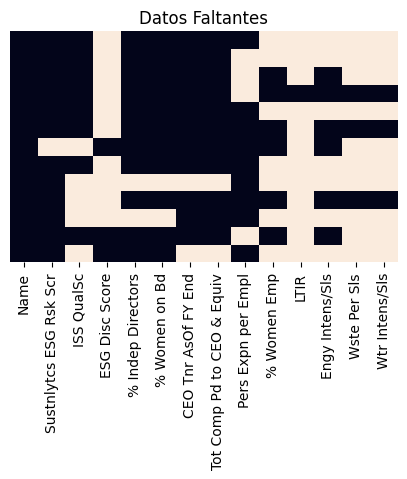

In [18]:
plt.figure(figsize=(5, 3))
sns.heatmap(esg.isnull(), cbar=False, yticklabels=False)
plt.title('Datos Faltantes')

plt.show()

En donde los datos faltantes están representados por el color rosado, podemos observar que incluso hay variables con má observaciones faltantes que presentes. Ahora analicemos cada una de estas para observar su comportamiento.

In [19]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 1 to 13
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name                        13 non-null     object
 1   Sustnlytcs ESG Rsk Scr      12 non-null     object
 2   ISS QualSc                  8 non-null      object
 3   ESG Disc Score              3 non-null      object
 4   % Indep Directors           11 non-null     object
 5   % Women on Bd               11 non-null     object
 6   CEO Tnr AsOf FY End         11 non-null     object
 7   Tot Comp Pd to CEO & Equiv  11 non-null     object
 8   Pers Expn per Empl          9 non-null      object
 9   % Women Emp                 6 non-null      object
 10  LTIR                        1 non-null      object
 11  Engy Intens/Sls             6 non-null      object
 12  Wste Per Sls                3 non-null      object
 13  Wtr Intens/Sls              3 non-null      object
d

Ahora procederemos a analizar cada una de estas.

### Name

Como ya se mencionó, esta hace referencia al nombre de las empresas.

En este caso vamos a comprobar si cada una se repite más de una vez o no.

In [20]:
esg['Name'].value_counts()

Name
Nintendo Co Ltd                   1
Garmin Ltd                        1
Logitech International SA         1
LG Electronics Inc                1
Sharp Corp/Japan                  1
Nikon Corp                        1
Hisense Visual Technology Co L    1
Casio Computer Co Ltd             1
TCL Electronics Holdings Ltd      1
Skyworth Group Ltd                1
Konka Group Co Ltd                1
GoPro Inc                         1
Funai Electric Co Ltd             1
Name: count, dtype: int64

Tal como se esperaba, cada empresa cuenta con una única observación.


###  Sustnlytcs ESG Rsk Scr

Esta variable en particular mide el riesgo de exposición y la gestión de la empresa a este riesgo de manera residual. Es decir que a mayor valor, la empresa está menos preparada para este riesgo.

In [21]:
esg['Sustnlytcs ESG Rsk Scr'] = esg['Sustnlytcs ESG Rsk Scr'].astype(float)

In [22]:
esg['Sustnlytcs ESG Rsk Scr'].describe()

count    12.000000
mean     10.314167
std       9.716174
min       0.000000
25%       0.000000
50%      12.065000
75%      20.475000
max      20.990000
Name: Sustnlytcs ESG Rsk Scr, dtype: float64

Observamos que hay una variabilidad en las puntuaciones de riesgo ESG entre las empresas estudiadas donde el menor puntaje es 0, es decir, con excelente gestión de riesgo ESG. La puntuación promedio es de 10.314167 con una variabilidad de 9.716174,lo que quiere decir que en general, las empresas tienen una exposición y una gestión de riesgos ESG que resultan en un nivel de riesgo medio.

Veamos ahora, cuál puntuación le correponde a cada empresa.

In [23]:
sustnlytcsempresa = esg[['Name', 'Sustnlytcs ESG Rsk Scr']].sort_values(by='Sustnlytcs ESG Rsk Scr', ascending=True)
sustnlytcsempresa

,Name,Sustnlytcs ESG Rsk Scr
9,TCL Electronics Holdings Ltd,0.00
12,GoPro Inc,0.00
11,Konka Group Co Ltd,0.00
10,Skyworth Group Ltd,0.00
13,Funai Electric Co Ltd,0.00
3,Logitech International SA,8.51
1,Nintendo Co Ltd,15.62
6,Nikon Corp,16.73
4,LG Electronics Inc,20.45
8,Casio Computer Co Ltd,20.55


Podemos observar que las compañías TCL Electronics Holdings Ltd, Skyworth Group Ltd, Konka Group Co Ltd, GoPro Inc y Funai Electric Co Ltd presentan la mejor puntuación posible, indicando así que gestionan los riesgos ESG de manera bastante efectiva. Por otra parte, LG Electronics Inc, Casio Computer Co Ltd, Sharp Corp/Japan y Garmin Ltd	parecen enfretar deficiencias altas en la gestión de los riesgos ESG. De las demás compañías se puede decir que están en nivel medio.

Después de haber visualizado esta tabla, notamos que hay un dato NA, por tanto, vamos a realizar su imputación.

Primero analicemos la normalidad de la variable.

Para esto haremos uso del test de Shpairo-Wilk.

H0: Datos siguen distribución normal.
H1: Datos no siguen distribución normal.

In [24]:
stat, p_valor = shapiro(esg['Sustnlytcs ESG Rsk Scr'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.004365820094017453
Los datos no parecen seguir una distribución normal


Se nos indica que los datos no siguen una distribución normal por lo que se imputará con la mediana.

In [25]:
imputer_median = SimpleImputer(strategy='median')
esg['Sustnlytcs ESG Rsk Scr'] = imputer_median.fit_transform(esg[['Sustnlytcs ESG Rsk Scr']])

In [26]:
esg['Sustnlytcs ESG Rsk Scr']

1     15.620
2     20.990
3      8.510
4     20.450
5     20.920
6     16.730
7     12.065
8     20.550
9      0.000
10     0.000
11     0.000
12     0.000
13     0.000
Name: Sustnlytcs ESG Rsk Scr, dtype: float64

Ahora estudiemos los atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f97cfb0880>,
 'caps': [<matplotlib.lines.Line2D at 0x1f97cfb0ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f97cfb05e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f97cfc4220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f97cfc44c0>],
 'means': []}

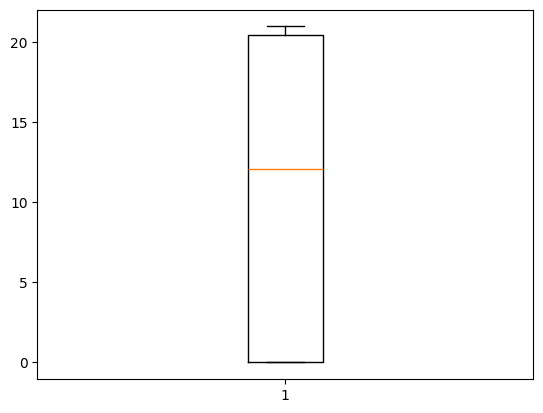

In [27]:
plt.boxplot(esg['Sustnlytcs ESG Rsk Scr'])

Obsrvamos que no hay datos atípicos.


### ISS QualSc

Con esta variable podemos analizar las prácticas de governanza corporativa de una empresa.

In [28]:
esg['ISS QualSc'].value_counts()

ISS QualSc
4    2
9    1
1    1
5    1
2    1
6    1
8    1
Name: count, dtype: int64

Teniendo en cuenta que una puntuación de 1 indica que la empresa está en el 10% inferior en términos de riesgo de gobernanza (es decir, con un riesgo muy bajo) y una puntuación de 10 indica que está en el 10% superior (es decir, con un riesgo muy alto). Se puede afirmar que 5 de las empresas están relativamente bien pues su califación se encuentra entre 1 y 5, es decir están en el 50% inferior, por otro lado, las 3 restantes tienen puntuación bastante alta.

In [29]:
riesgogobernanzaempresa = esg[['Name', 'ISS QualSc']].sort_values(by='ISS QualSc', ascending=False)
riesgogobernanzaempresa

,Name,ISS QualSc
2,Garmin Ltd,9
12,GoPro Inc,8
8,Casio Computer Co Ltd,6
4,LG Electronics Inc,5
1,Nintendo Co Ltd,4
5,Sharp Corp/Japan,4
6,Nikon Corp,2
3,Logitech International SA,1
7,Hisense Visual Technology Co L,NaN
9,TCL Electronics Holdings Ltd,NaN


Garmin Ltd, GoPro Inc y Casio Computer Co Ltd cuentan con las puntuaciones más altas.

Ahora se imputarán los valores faltantes que se observan en la tabla.

Dado que trabajamos con estos datos de tipo factor, la imputación se hará con la moda.

In [31]:
imputer_moda = SimpleImputer(strategy='most_frequent')
esg['ISS QualSc'] = imputer_moda.fit_transform(esg[['ISS QualSc']])

ValueError: 2

### ESG Disc Score

Proporciona visión detallada de impacto ESG de una empresa.

In [287]:
esg['ESG Disc Score'] = esg['ESG Disc Score'].astype(float)

In [288]:
esgempresa = esg[['Name', 'ESG Disc Score']].sort_values(by='ESG Disc Score', ascending=False)
esgempresa

,Name,ESG Disc Score
7,Hisense Visual Technology Co L,44.63
12,GoPro Inc,41.28
13,Funai Electric Co Ltd,32.52
1,Nintendo Co Ltd,NaN
2,Garmin Ltd,NaN
3,Logitech International SA,NaN
4,LG Electronics Inc,NaN
5,Sharp Corp/Japan,NaN
6,Nikon Corp,NaN
8,Casio Computer Co Ltd,NaN


Para esta variable en particular, vamos a realizar una aclaración.

Es evidente que más del 50% de la columna es de tipo NA, sin embargo, esta es una variable,a nuestro parecer, bastante importante por lo que en la práctica de este EDA los imputaremos.

Tenemos la idea de acudir a nuestra tutora con el fin de ver si es posible encontrar los valores reales de esta variable para las empresas.

Seguiremos la práctica de evaluar la normalidad primero.

In [289]:
stat, p_valor = shapiro(esg['ESG Disc Score'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.5179076952740529
Los datos parecen seguir una distribución normal


In [290]:
imputer_mean = SimpleImputer(strategy='median')
esg['ESG Disc Score'] = imputer_mean.fit_transform(esg[['ESG Disc Score']])

In [291]:
esg['ESG Disc Score']

1     41.28
2     41.28
3     41.28
4     41.28
5     41.28
6     41.28
7     44.63
8     41.28
9     41.28
10    41.28
11    41.28
12    41.28
13    32.52
Name: ESG Disc Score, dtype: float64

### % Indep Directors

In [292]:
esg['% Indep Directors'] = esg['% Indep Directors'].astype(float)

In [293]:
esg['% Indep Directors'].describe()

count     11.000000
mean      59.229091
std       20.549176
min       37.500000
25%       44.155000
50%       54.550000
75%       66.670000
max      100.000000
Name: % Indep Directors, dtype: float64

Esta variable brinda el porcentaje de directores independientes, los cuales son importantes pues sus decisiones de mejoras pueden ser más responsables y objetivas en el área de la governanza.

Vemos que el promedio de este porcentaje evaluado en todas las empresas es de 59.229091 con una variabilidad considerable de 20.549176. Dicha desviación podemos decir que se debe a la diferencia entre el valor mínimo y máximo, 37.5 y 100 respectivamente, que están un poco alejados.

In [294]:
porcindempresa = esg[['Name', '% Indep Directors', 'ISS QualSc']].sort_values(by='% Indep Directors', ascending=True)
porcindempresa 

,Name,% Indep Directors,ISS QualSc
7,Hisense Visual Technology Co L,37.50,NaN
10,Skyworth Group Ltd,37.50,NaN
13,Funai Electric Co Ltd,42.86,NaN
8,Casio Computer Co Ltd,45.45,6
1,Nintendo Co Ltd,46.15,4
6,Nikon Corp,54.55,2
2,Garmin Ltd,66.67,9
4,LG Electronics Inc,66.67,5
5,Sharp Corp/Japan,66.67,4
12,GoPro Inc,87.50,8


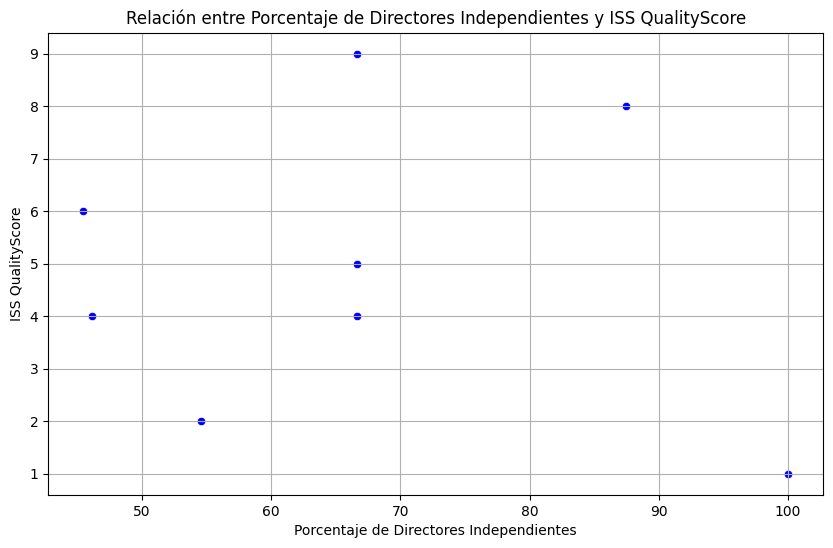

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

esg['ISS QualSc'] = esg['ISS QualSc'].astype(float).astype('Int64') #Cambio a tipo num temporal

plt.figure(figsize=(10, 6))
sns.scatterplot(x=esg['% Indep Directors'], y=esg['ISS QualSc'], data=esg, marker='o', color='blue')

plt.title('Relación entre Porcentaje de Directores Independientes y ISS QualityScore')
plt.xlabel('Porcentaje de Directores Independientes')
plt.ylabel('ISS QualityScore')
plt.grid(True)
plt.show()


Vemos que la medida de qué tan buena es la gobernanza de cada empresa no guarda mucha relación con el porcentaje de directores independientes.

In [296]:
esg['ISS QualSc'] = esg['ISS QualSc'].astype(object)

Ahora imputaremos los datos atípicos.

Para esto haremos uso del test de Shpairo-Wilk.

H0: Datos siguen distribución normal.

H1: Datos no siguen distribución normal.

In [297]:
stat, p_valor = shapiro(esg['% Indep Directors'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.15444935232682333
Los datos parecen seguir una distribución normal


Por tanto, se tarbaja con la media.

In [298]:
imputer_mean = SimpleImputer(strategy='mean')
esg['% Indep Directors'] = imputer_mean.fit_transform(esg[['% Indep Directors']])

In [299]:
esg['% Indep Directors']

1      46.150000
2      66.670000
3     100.000000
4      66.670000
5      66.670000
6      54.550000
7      37.500000
8      45.450000
9      59.229091
10     37.500000
11     59.229091
12     87.500000
13     42.860000
Name: % Indep Directors, dtype: float64

En efecto, se realizó la imputación.

Ahora veamos si hay datos atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b0851c40>,
 'caps': [<matplotlib.lines.Line2D at 0x235b08601c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b08519a0>],
 'medians': [<matplotlib.lines.Line2D at 0x235b0860700>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b08609a0>],
 'means': []}

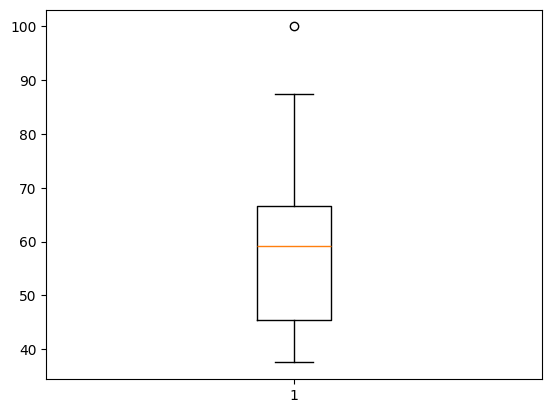

In [300]:
plt.boxplot(esg['% Indep Directors'])

Vemos que se cuenta con único dato atípico siendo este superior e igual a 100. Es decir, el dato atípico es el 100% de directores independientes en la compañía Logitech International SA.

### % Women on Bd

Cantidad de mujeres en la junta de la empresa. 
Este porcenaje puede ser importante para el criterio social.

In [301]:
esg['% Women on Bd'] = esg['% Women on Bd'].astype(float)

In [302]:
esg['% Women on Bd'].describe()

count    11.000000
mean     19.013636
std      11.970552
min       0.000000
25%      11.805000
50%      16.670000
75%      27.885000
max      40.000000
Name: % Women on Bd, dtype: float64

Podemos ver que el porcentaje de mujeres en la junta es bastante pequeño (19%) lo que puede ser mal visto socialmente.
Asimismo, el valor mínimo indica que alguna de las empresas no tienen presencia de mujeres y el porcentaje más alto es de apenas 40%.

Veamos cuáles empresas presentan cada porcentaje.

In [303]:
womjunempresa = esg[['Name', '% Women on Bd']].sort_values(by='% Women on Bd', ascending=True)
womjunempresa

,Name,% Women on Bd
13,Funai Electric Co Ltd,0.00
8,Casio Computer Co Ltd,9.09
5,Sharp Corp/Japan,11.11
7,Hisense Visual Technology Co L,12.50
10,Skyworth Group Ltd,12.50
4,LG Electronics Inc,16.67
6,Nikon Corp,18.18
12,GoPro Inc,25.00
1,Nintendo Co Ltd,30.77
2,Garmin Ltd,33.33


Observamos que en general el porcentaje de mujeres en la junta es bastane bajo, el mayor de estos ni siquiera llega la 50% e incluso el menor que corresponde a la empresa Funai Electric Co Ltd es del 0%. Esto demuestra que en este tipo de empresas la participación de las mujeres es reducida.

Ahora, como se ve en la tabla, existen datos atípicos, por tanto, vamos a imputarlos, analizando antes su normalidad.

Para esto haremos uso del test de Shpairo-Wilk.

H0: Datos siguen distribución normal.

H1: Datos no siguen distribución normal.

In [304]:
stat, p_valor = shapiro(esg['% Women on Bd'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.7573507648246522
Los datos parecen seguir una distribución normal


Entonces, la imputación se hará con la media.

In [305]:
imputer_mean = SimpleImputer(strategy='mean')
esg['% Women on Bd'] = imputer_mean.fit_transform(esg[['% Women on Bd']])

In [306]:
esg['% Women on Bd']

1     30.770000
2     33.330000
3     40.000000
4     16.670000
5     11.110000
6     18.180000
7     12.500000
8      9.090000
9     19.013636
10    12.500000
11    19.013636
12    25.000000
13     0.000000
Name: % Women on Bd, dtype: float64

Ahora, analicemos la presencia de datos atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b0a94c40>,
 'caps': [<matplotlib.lines.Line2D at 0x235b0ab3580>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b0aa0e80>],
 'medians': [<matplotlib.lines.Line2D at 0x235b0ab3ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b0ab3d60>],
 'means': []}

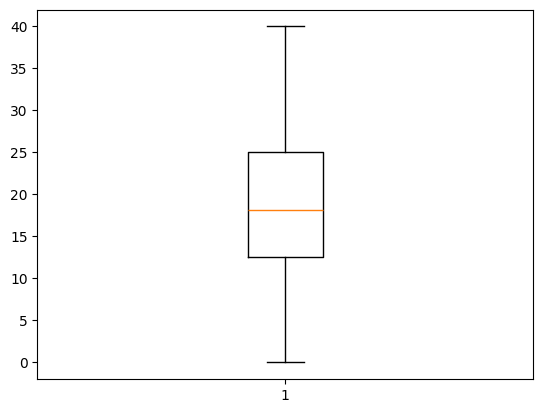

In [307]:
plt.boxplot(esg['% Women on Bd'])

Vemos que no hay datos atípicos y el que los valores parecen estar un poco balanceados.

### CEO Tnr AsOf FY End

Indica cuántos años lleva el CEO en su puesto hasta la fecha de corte.

Lo primero que haremos es pasarlo a tipo numérico para poder analizar mejor los valores entre empresas.

In [308]:
esg['CEO Tnr AsOf FY End'] = esg['CEO Tnr AsOf FY End'].astype(float)

Ahora, vamos a analizar algunas características descriptivas.

In [309]:
esg['CEO Tnr AsOf FY End'].describe()

count    11.000000
mean      3.680909
std       4.164907
min       0.330000
25%       0.960000
50%       2.000000
75%       4.330000
max      12.080000
Name: CEO Tnr AsOf FY End, dtype: float64

Esto quiere decir que el tiempo promedio de duración de los CEO's es de 3.680909 años, 3.9 aproximado, e incluso vemos que la valor de la desviación estándar es superior dada la gran diferencia entre el dato mínimo de 0.33 años y el dato mayor de 12.08 años.

Ahora, veamos a cuál empresa corresponde cada una de estas duraciones.

In [310]:
durceoempresa = esg[['Name', 'CEO Tnr AsOf FY End']].sort_values(by='CEO Tnr AsOf FY End', ascending=True)
durceoempresa

,Name,CEO Tnr AsOf FY End
3,Logitech International SA,0.33
11,Konka Group Co Ltd,0.75
7,Hisense Visual Technology Co L,0.92
6,Nikon Corp,1.00
10,Skyworth Group Ltd,1.75
4,LG Electronics Inc,2.00
5,Sharp Corp/Japan,2.00
8,Casio Computer Co Ltd,2.83
1,Nintendo Co Ltd,5.83
2,Garmin Ltd,11.00


Lo que podemos interpretar es que la empresa en donde el CEO duró menos tiempo es Logitech International SA. También se observa que en general la duración fue bastante baja, exceptuando a Garmin Ltd y GoPro Inc, en donde la duración de estos directivos fue de más de 10 años, y en las demás el máximo de casi 6 años.

Ahora veamos si existen datos faltantes

Tal como se observa en la tabla, en efecto existen datos faltantes.

Ahora bien, para realizar la imputación de estos primero toca evaluar su normalidad, lo cual haremos con el test de Shapiro-Wilk.

H0: Datos siguen distribución normal.

H1: Datos no siguen distribución normal.

In [311]:
stat, p_valor = shapiro(esg['CEO Tnr AsOf FY End'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.0017857298931570308
Los datos no parecen seguir una distribución normal


Tal como se esperaba, debido a la gran dispersión de los datos entre sí, la muestra no sigue una distribución normal.

Es decir, la imputación se realizará con la mediana.

In [312]:
imputer_median = SimpleImputer(strategy='median')
esg['CEO Tnr AsOf FY End'] = imputer_median.fit_transform(esg[['CEO Tnr AsOf FY End']])

In [313]:
esg['CEO Tnr AsOf FY End']

1      5.83
2     11.00
3      0.33
4      2.00
5      2.00
6      1.00
7      0.92
8      2.83
9      2.00
10     1.75
11     0.75
12    12.08
13     2.00
Name: CEO Tnr AsOf FY End, dtype: float64

Observamos que efectivamente se realizó la imputación. Esto nos da lugar entonces a detectar si existen o no datos atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b0b1dd30>,
 'caps': [<matplotlib.lines.Line2D at 0x235b0b2d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b0b1da90>],
 'medians': [<matplotlib.lines.Line2D at 0x235b0b2d7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b0b2da90>],
 'means': []}

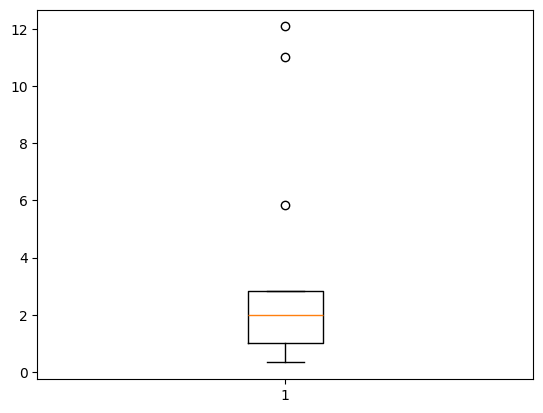

In [314]:
plt.boxplot(esg['CEO Tnr AsOf FY End'])

Podemos observar que en efecto contamos con la existencia de 3 outliers.

Además, lo que se mencionaba de que habían años muy superiores comparados con otros se observa en el tamaño de la caja y los valores en los que se concentra.

### Tot Comp Pd to CEO & Equiv

Para el análisis de esta variable, vamos a convertir la variable a tipo numérico.

In [315]:
esg['Tot Comp Pd to CEO & Equiv'] = esg['Tot Comp Pd to CEO & Equiv'].astype(float).astype('Int64')

In [316]:
esg['Tot Comp Pd to CEO & Equiv'].describe()

count              11.0
mean     4239568.181818
std      5032261.808996
min            198990.0
25%            935715.0
50%           1790000.0
75%           6110000.0
max          16000000.0
Name: Tot Comp Pd to CEO & Equiv, dtype: Float64

El análisis muestra que el promedio pagado a los CEO y ejecutivos equivalentes es aproximadamente $4239568, con una desviación estándar cercana a $5032261. Esta alta desviación estándar refleja una significativa variabilidad en los sueldos, debido a las grandes diferencias entre los valores individuales. El sueldo más bajo registrado es de $198990, mientras que el sueldo más alto alcanza los $16,000,000. Esta amplia gama de sueldos contribuye a la notable desviación estándar observada

In [317]:
sueldoceoempresa = esg[['Name', 'Tot Comp Pd to CEO & Equiv']].sort_values(by='Tot Comp Pd to CEO & Equiv', ascending=False)
sueldoceoempresa

,Name,Tot Comp Pd to CEO & Equiv
3,Logitech International SA,16000000
10,Skyworth Group Ltd,10340000
2,Garmin Ltd,6540000
12,GoPro Inc,5680000
1,Nintendo Co Ltd,2480000
4,LG Electronics Inc,1790000
8,Casio Computer Co Ltd,1270000
6,Nikon Corp,1050000
5,Sharp Corp/Japan,821430
7,Hisense Visual Technology Co L,464830


Es decir que la empresa que más le paga a su CEO y ejecutivos equivalentes es Logitech International SA, mientras que la que tiene menor sueldo es Konka Group Co Ltd.

Ahora bien, es evidente que esta variable cuenta con datos faltantes. Para decidir cómo imputarlos, analicemos su normalidad. 

Para esto haremos uso del test de Shpairo-Wilk.

H0: Datos siguen distribución normal.
H1: Datos no siguen distribución normal.

In [318]:
stat, p_valor = shapiro(esg['Tot Comp Pd to CEO & Equiv'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.007403639701593033
Los datos no parecen seguir una distribución normal


Dado que no se sigue una distribución normal, entonces se realizará la imputación con la mediana.

In [319]:
imputer_median = SimpleImputer(strategy='median')
esg['Tot Comp Pd to CEO & Equiv'] = imputer_median.fit_transform(esg[['Tot Comp Pd to CEO & Equiv']])


In [320]:
esg['Tot Comp Pd to CEO & Equiv']

1      2480000.0
2      6540000.0
3     16000000.0
4      1790000.0
5       821430.0
6      1050000.0
7       464830.0
8      1270000.0
9      1790000.0
10    10340000.0
11      198990.0
12     5680000.0
13     1790000.0
Name: Tot Comp Pd to CEO & Equiv, dtype: float64

Luego de esto, veamos si hay datos atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b0b8ee80>,
 'caps': [<matplotlib.lines.Line2D at 0x235b0b9e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b0b8ebe0>],
 'medians': [<matplotlib.lines.Line2D at 0x235b0b9e940>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b0b9ebe0>],
 'means': []}

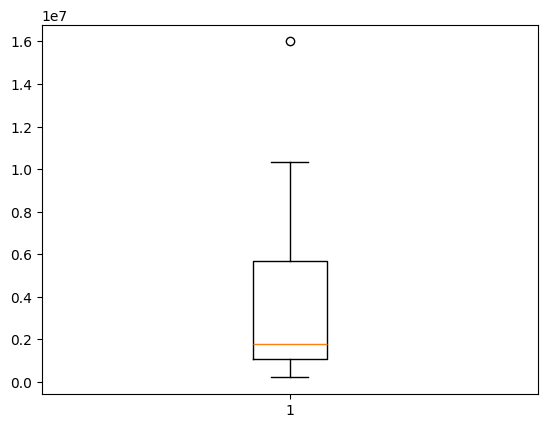

In [321]:
plt.boxplot(esg['Tot Comp Pd to CEO & Equiv'])


En efecto existe un dato atípico, que vendría siendo el valor de 16M.

### Pers Expn per Empl   

Para el análisis de esta variable, vamos a convertir la variable a tipo numérico.

In [322]:
esg['Pers Expn per Empl'] = esg['Pers Expn per Empl'].astype(float).astype('Int64')

In [323]:
esg['Pers Expn per Empl'].describe()

count             9.0
mean     27225.555556
std      18351.948882
min            8170.0
25%           13020.0
50%           20920.0
75%           31530.0
max           62460.0
Name: Pers Expn per Empl, dtype: Float64

Esta variable nos indica lo que se gastan en promedio con los empleados.

Podemos observar que en esta ocasión los datos extremos son relativamente cercanos entre sí. El promedio de estos es de aproximadamente $27225 con desviación estandar de $18351 aprox. Va de la mano con mencionado en un principio donde el valor mínimo es $8170 y el mayor $62460.



In [324]:
sueldoempleadoprom = esg[['Name', 'Pers Expn per Empl']].sort_values(by='Pers Expn per Empl', ascending=False)
sueldoempleadoprom

,Name,Pers Expn per Empl
6,Nikon Corp,62460
1,Nintendo Co Ltd,49290
8,Casio Computer Co Ltd,31530
9,TCL Electronics Holdings Ltd,30290
5,Sharp Corp/Japan,20920
10,Skyworth Group Ltd,17710
7,Hisense Visual Technology Co L,13020
13,Funai Electric Co Ltd,11640
11,Konka Group Co Ltd,8170
2,Garmin Ltd,<NA>


En este caso, la empresa que cuenta un mayor promedio en cuanto al sueldo de los empleados es Nikon Corp con $62420, mientras que, según los registros, la que menos es nuevamente Konka Group Co Ltd.

Evidenteme hay datos faltantes, por tanto, se imputarán.

Primero veamos si siguen distribución normal o no.

Con Shapiro-Wilk. 

H0: Datos siguen distribución normal.
H1: Datos no siguen distribución normal.

In [325]:
stat, p_valor = shapiro(esg['Pers Expn per Empl'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.21066837466315236
Los datos parecen seguir una distribución normal


El p-valor es superior a 0.05, por tanto, los datos siguen una distribución normal lo que quiere decir que se imputará con la media.

In [326]:
imputer_median = SimpleImputer(strategy='mean')
esg['Pers Expn per Empl'] = imputer_median.fit_transform(esg[['Pers Expn per Empl']])

In [327]:
esg['Pers Expn per Empl']

1     49290.000000
2     27225.555556
3     27225.555556
4     27225.555556
5     20920.000000
6     62460.000000
7     13020.000000
8     31530.000000
9     30290.000000
10    17710.000000
11     8170.000000
12    27225.555556
13    11640.000000
Name: Pers Expn per Empl, dtype: float64

Veamos ahora si hay datos atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b0c54160>,
 'caps': [<matplotlib.lines.Line2D at 0x235b0c546a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b0c46e80>],
 'medians': [<matplotlib.lines.Line2D at 0x235b0c54be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b0c54e80>],
 'means': []}

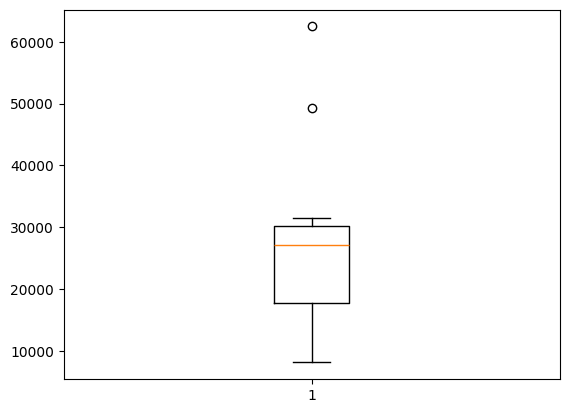

In [328]:
plt.boxplot(esg['Pers Expn per Empl'])

###  % Women Emp                

Esta es otra variable importante para el campo social pues se trata del porcentaje de mujeres en la empresa, independientemente de su rol.

Es interesante analizar esta luego de haber estudiado el porcentaje pero solo de las que estaban en la junta.

Tal como se ha venido haciendo, el primer paso es convertir los valores de la variable a tipo numérico.

In [329]:
esg['% Women Emp'] = esg['% Women Emp'].astype(float)

Veamos las medidas de esta y analicemos si hubo algún cambio respecto a la que solo pertenecen a la junta.

In [330]:
esg['% Women Emp'].describe()

count     6.000000
mean     33.948333
std       7.189944
min      21.960000
25%      30.800000
50%      36.150000
75%      37.825000
max      42.030000
Name: % Women Emp, dtype: float64

Podemos ver que en esta ocasión contamos con resultados relativamente mejores.

El promedio de mujeres en **toda** la empresa resultó ser del 34% (aproximado), lo cual es mayor que el 19% obtenido únicamente en la junta.

También cabe mencionar que en esta ocasión el valor minimo obtenido es de 21.96, bastante mejor que el 0, sin embargo, el valor mayor no varió mucho y se mantuvo cercano siendo de 42%.

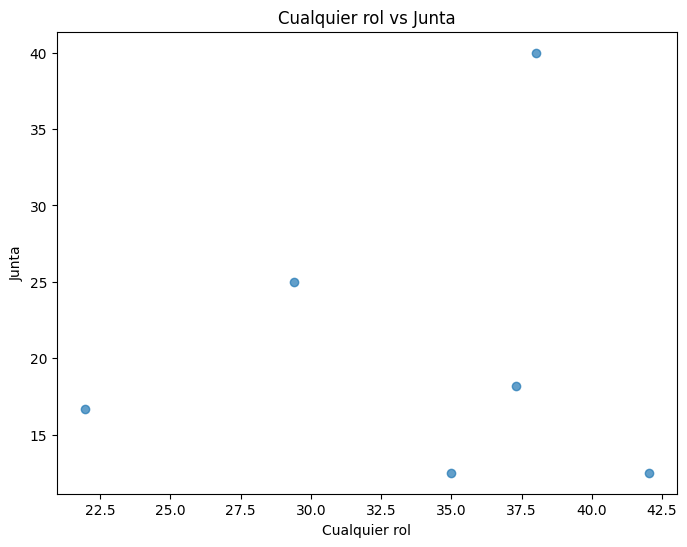

In [334]:
plt.figure(figsize=(8, 6))
plt.scatter(esg['% Women Emp'], esg['% Women on Bd'], alpha=0.7)
plt.title('Cualquier rol vs Junta')
plt.xlabel('Cualquier rol')
plt.ylabel('Junta')
plt.show()

En primera instancia, vemos que no hay un relación lineal estable entre ellas. Sin embargo, sí se puede notar que en general los puntos de las mujeres en cualquier rol están en valores mayores que los de solo junta.

Ahora, notemos si exiten datos faltantes o no.

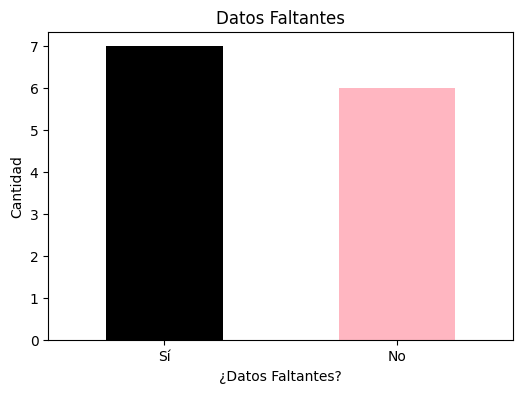

In [342]:
na_ = esg['% Women Emp'].isnull().value_counts()

plt.figure(figsize=(6, 4))
na_.plot(kind='bar', color=['black', 'lightpink'])
plt.title('Datos Faltantes')
plt.xlabel('¿Datos Faltantes?')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Sí', 'No'], rotation=0)
plt.show()

In [344]:
cant_na = esg['% Women Emp'].isnull().sum()
tot = esg['% Women Emp'].shape[0]
porcentaje_na = (cant_na / tot) * 100
porcentaje_na 

53.84615384615385

En efecto tenemos que aproximadamente el 54% de los datos son de tipo NA, es un porcentaje considerable.

Ahora, procederemos a imputarlos. 

Evaluemos primero la normalidad.

Para esto haremos uso del test de Shpairo-Wilk.

H0: Datos siguen distribución normal.

H1: Datos no siguen distribución normal.

In [345]:
stat, p_valor = shapiro(esg['% Women Emp'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.5961812574297594
Los datos parecen seguir una distribución normal


Lo anterior nos indica que la imputación debe realizarse haciendo uso de la media.

In [346]:
imputer_mean = SimpleImputer(strategy='mean')
esg['% Women Emp'] = imputer_mean.fit_transform(esg[['% Women Emp']])

In [347]:
esg['% Women Emp']

1     33.948333
2     33.948333
3     38.000000
4     21.960000
5     33.948333
6     37.300000
7     42.030000
8     33.948333
9     33.948333
10    35.000000
11    33.948333
12    29.400000
13    33.948333
Name: % Women Emp, dtype: float64

Luego de observar que sí se realizó la imputación de manera satisfactoria, procederemos entonces a detectar datos atípicos con la ayuda de Boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b10673a0>,
 'caps': [<matplotlib.lines.Line2D at 0x235b11bc5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b10677c0>],
 'medians': [<matplotlib.lines.Line2D at 0x235b11bc1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b1489070>],
 'means': []}

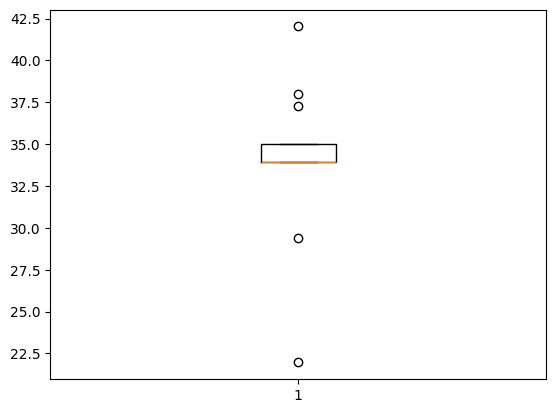

In [348]:
plt.boxplot(esg['% Women Emp'])

Observamos que existen varios outliers y que la caja está bastante concentrada. Esto se debe a que la imputación se le realizó a más de la mitad de las observaciones.

### LTIR                        

Esta es una métrica que se encarga de medir qué tan seguro es el ambiente laboral en una empresa.

En este caso se calcula multiplicando el total de incidentes por un número de empleados y este resultado dividiéndolo entre la cantidad de horas trabajadas. 

Cabe resaltar que entre mayor sea LTIR, entonces significa que los incidentes son recurrentes y por ende hay problmeas con la seguridad.

En particular, esta variable cuenta con un solo valor. Veamoslo graficamente.

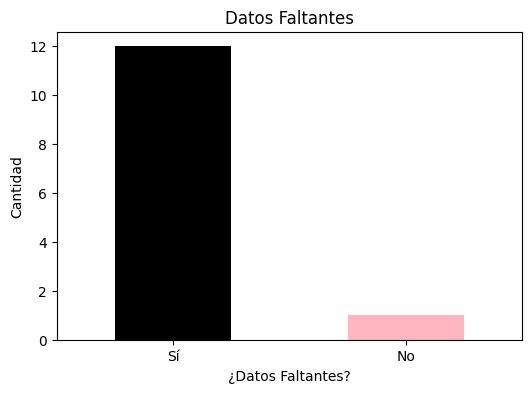

In [349]:
na_ = esg['LTIR'].isnull().value_counts()

plt.figure(figsize=(6, 4))
na_.plot(kind='bar', color=['black', 'lightpink'])
plt.title('Datos Faltantes')
plt.xlabel('¿Datos Faltantes?')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Sí', 'No'], rotation=0)
plt.show()

Esto significa que la variable no brinda suficiente información, por lo tanto se borrará de la base de datos.

In [350]:
esg = esg.drop('LTIR', axis=1)

### Engy Intens/Sls             

Esta variable es un indicador de la eficiencia energética de la empresa.

Primero pasemos los valores a tipo numérico.

In [355]:
esg['Engy Intens/Sls'] = esg['Engy Intens/Sls'].astype(float)

Veamos datos descriptivos sobre la variable.

In [356]:
esg['Engy Intens/Sls'].describe()

count     6.000000
mean     25.418333
std      35.185435
min       2.530000
25%       5.660000
50%      10.800000
75%      25.060000
max      94.620000
Name: Engy Intens/Sls, dtype: float64

Podemos ver que el promedio de eficiencia energética de las empresas es relativamente bajo, siendo este de 25%, lo que indica que en general las empresas consumen menos energía lo cual es bueno. Sin embargo, veamos la alta desviación estandar, dada por la gran diferencia entre el valor superior e inferior que son 94.6% y 2.5%.

Ahora veamos esto en una tabla para conocer a cuales empresas corresponde cada porcentaje.

In [357]:
energiaempresa = esg[['Name', 'Engy Intens/Sls']].sort_values(by='Engy Intens/Sls', ascending=True)
energiaempresa

,Name,Engy Intens/Sls
12,GoPro Inc,2.53
7,Hisense Visual Technology Co L,5.63
3,Logitech International SA,5.75
10,Skyworth Group Ltd,15.85
4,LG Electronics Inc,28.13
6,Nikon Corp,94.62
1,Nintendo Co Ltd,NaN
2,Garmin Ltd,NaN
5,Sharp Corp/Japan,NaN
8,Casio Computer Co Ltd,NaN


Es decir que GoPro Inc es la mejor en términos de eficiencia de energía y la peor es Nikon Corp.

Ahora vemos que claramente existen valores faltantes, por tanto, analizaremos la normalidad para poder imputar.

In [358]:
stat, p_valor = shapiro(esg['Engy Intens/Sls'].dropna())
print(f'Valor p: {p_valor}')

alpha = 0.05
if p_valor > alpha:
    print("Los datos parecen seguir una distribución normal")
else:
    print("Los datos no parecen seguir una distribución normal")

Valor p: 0.008381833356050044
Los datos no parecen seguir una distribución normal


Es decir que la imputación se hará con la mediana.

In [359]:
imputer_median = SimpleImputer(strategy='median')
esg['Engy Intens/Sls'] = imputer_median.fit_transform(esg[['Engy Intens/Sls']])

In [360]:
esg['Engy Intens/Sls']

1     10.80
2     10.80
3      5.75
4     28.13
5     10.80
6     94.62
7      5.63
8     10.80
9     10.80
10    15.85
11    10.80
12     2.53
13    10.80
Name: Engy Intens/Sls, dtype: float64

Ahora detectemos valores atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x235b11a2370>,
 'caps': [<matplotlib.lines.Line2D at 0x235b11a2a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x235b0ad1a90>],
 'medians': [<matplotlib.lines.Line2D at 0x235b0f19e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x235b0f19be0>],
 'means': []}

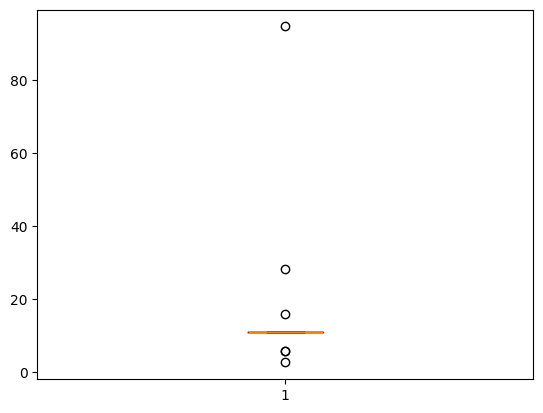

In [361]:
plt.boxplot(esg['Engy Intens/Sls'])

Tal como era de esperarse, debido a la imputación se presenta este tipo de comportamiento en la caja, haciendo que haya más probabilidad de tener valores atípicos como se muestra en la gráfica.

### Wste Per Sls                

Esta variable hace referencia a la cantidad de desechos, siendo un indicador del impacto ambiental, no obstante, al observar la tabla, podemos darnos cuenta de que cuenta solo con 3 observaciones.

In [364]:
tot= esg['Wste Per Sls'].shape[0]
na_= esg['Wste Per Sls'].isnull().sum()
prct_na = (na_ / tot) * 100
prct_na

76.92307692307693

Es decir que, del 100% de las observaciones, el 76% son datos faltantes por lo que la variable no resulta útil y por ende será borrada.

In [365]:
esg = esg.drop('Wste Per Sls', axis=1)

### Wtr Intens/Sls 

Este es otro indicador de eficiencia en el uso de recursos relacionado con el agua.

Nuevamente nos encontramos con una variable de solo 3 observaciones, por lo tanto su representación de NA también es 76%, lo que quiere decir que será eliminada del conjunto de datos.

In [366]:
esg = esg.drop('Wtr Intens/Sls', axis=1)

### Base final

Nos resulta entonces la base siguiente

In [373]:
esg

,Name,Sustnlytcs ESG Rsk Scr,ISS QualSc,ESG Disc Score,% Indep Directors,% Women on Bd,CEO Tnr AsOf FY End,Tot Comp Pd to CEO & Equiv,Pers Expn per Empl,% Women Emp,Engy Intens/Sls
1,Nintendo Co Ltd,15.620,4,41.28,46.150000,30.770000,5.83,2480000.0,49290.000000,33.948333,10.80
2,Garmin Ltd,20.990,9,41.28,66.670000,33.330000,11.00,6540000.0,27225.555556,33.948333,10.80
3,Logitech International SA,8.510,1,41.28,100.000000,40.000000,0.33,16000000.0,27225.555556,38.000000,5.75
4,LG Electronics Inc,20.450,5,41.28,66.670000,16.670000,2.00,1790000.0,27225.555556,21.960000,28.13
5,Sharp Corp/Japan,20.920,4,41.28,66.670000,11.110000,2.00,821430.0,20920.000000,33.948333,10.80
6,Nikon Corp,16.730,2,41.28,54.550000,18.180000,1.00,1050000.0,62460.000000,37.300000,94.62
7,Hisense Visual Technology Co L,12.065,4,44.63,37.500000,12.500000,0.92,464830.0,13020.000000,42.030000,5.63
8,Casio Computer Co Ltd,20.550,6,41.28,45.450000,9.090000,2.83,1270000.0,31530.000000,33.948333,10.80
9,TCL Electronics Holdings Ltd,0.000,4,41.28,59.229091,19.013636,2.00,1790000.0,30290.000000,33.948333,10.80
10,Skyworth Group Ltd,0.000,4,41.28,37.500000,12.500000,1.75,10340000.0,17710.000000,35.000000,15.85
